In [21]:
import numpy as np
from numpy import random
import scipy.signal as signal
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from matplotlib import style


In [22]:
# Signs samplying rate of 10kHz, nyq = 5000

fs = 10000
nyq = fs/2
t = np.linspace(0, 1, fs+1)

sig_50Hz = np.sin(2*np.pi*50*t)
sig_110Hz = np.sin(2*np.pi*110*t)
sig_170Hz = np.sin(2*np.pi*170*t)
sig_230Hz = np.sin(2*np.pi*230*t)

sig_50Hz_110Hz_170Hz_230Hz = sig_50Hz+sig_110Hz+sig_170Hz+sig_230Hz

sig_random = 0.001*random.rand(len(t))

sig_50Hz_110Hz_170Hz_230Hz_random = sig_50Hz_110Hz_170Hz_230Hz + sig_random


In [23]:
numtaps = 10001
lpf_cutoff = 55
hpf_cutoff = 225
bp_cutoff1 = 105
bp_cutoff2 = 175

In [24]:
# Lowpass
lowpass_coef = signal.firwin(numtaps,lpf_cutoff,nyq=nyq)
lpf_output = signal.convolve(sig_50Hz_110Hz_170Hz_230Hz,lowpass_coef,mode='same')

In [25]:
# Highpass
highpass_coef = signal.firwin(numtaps,hpf_cutoff,pass_zero=False,nyq=nyq)
hpf_output = signal.convolve(sig_50Hz_110Hz_170Hz_230Hz,highpass_coef,mode='same')

In [26]:
# Bandpass
bandpass_coef = signal.firwin(numtaps,[bp_cutoff1,bp_cutoff2],pass_zero=False,nyq=nyq)
bandpass_output = signal.convolve(sig_50Hz_110Hz_170Hz_230Hz,bandpass_coef,mode='same')

In [27]:
freq_domain_sig_50Hz_110Hz_170Hz_230Hz_random = fft(
    sig_50Hz_110Hz_170Hz_230Hz_random)
freq_domain_sig_filtered_55Hz = fft(lpf_output)
freq_domain_sig_filtered_225Hz = fft(hpf_output)
freq_domain_sig_filtered_105_175Hz = fft(bandpass_output)


In [28]:
freq_domain_sig_50Hz_110Hz_170Hz_230Hz_random_db = 20 * \
    np.log10(np.abs(freq_domain_sig_50Hz_110Hz_170Hz_230Hz_random))
freq_domain_sig_filtered_55Hz_db = 20 * \
    np.log10(np.abs(freq_domain_sig_filtered_55Hz))
freq_domain_sig_filtered_225Hz_db = 20 * \
    np.log10(np.abs(freq_domain_sig_filtered_225Hz))
freq_domain_sig_filtered_105_175Hz_db = 20 * \
    np.log10(np.abs(freq_domain_sig_filtered_105_175Hz))


In [29]:
style.use('dark_background')

/home/hilmy/Documents/labs/notebook/praktikum tpid/.venv/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


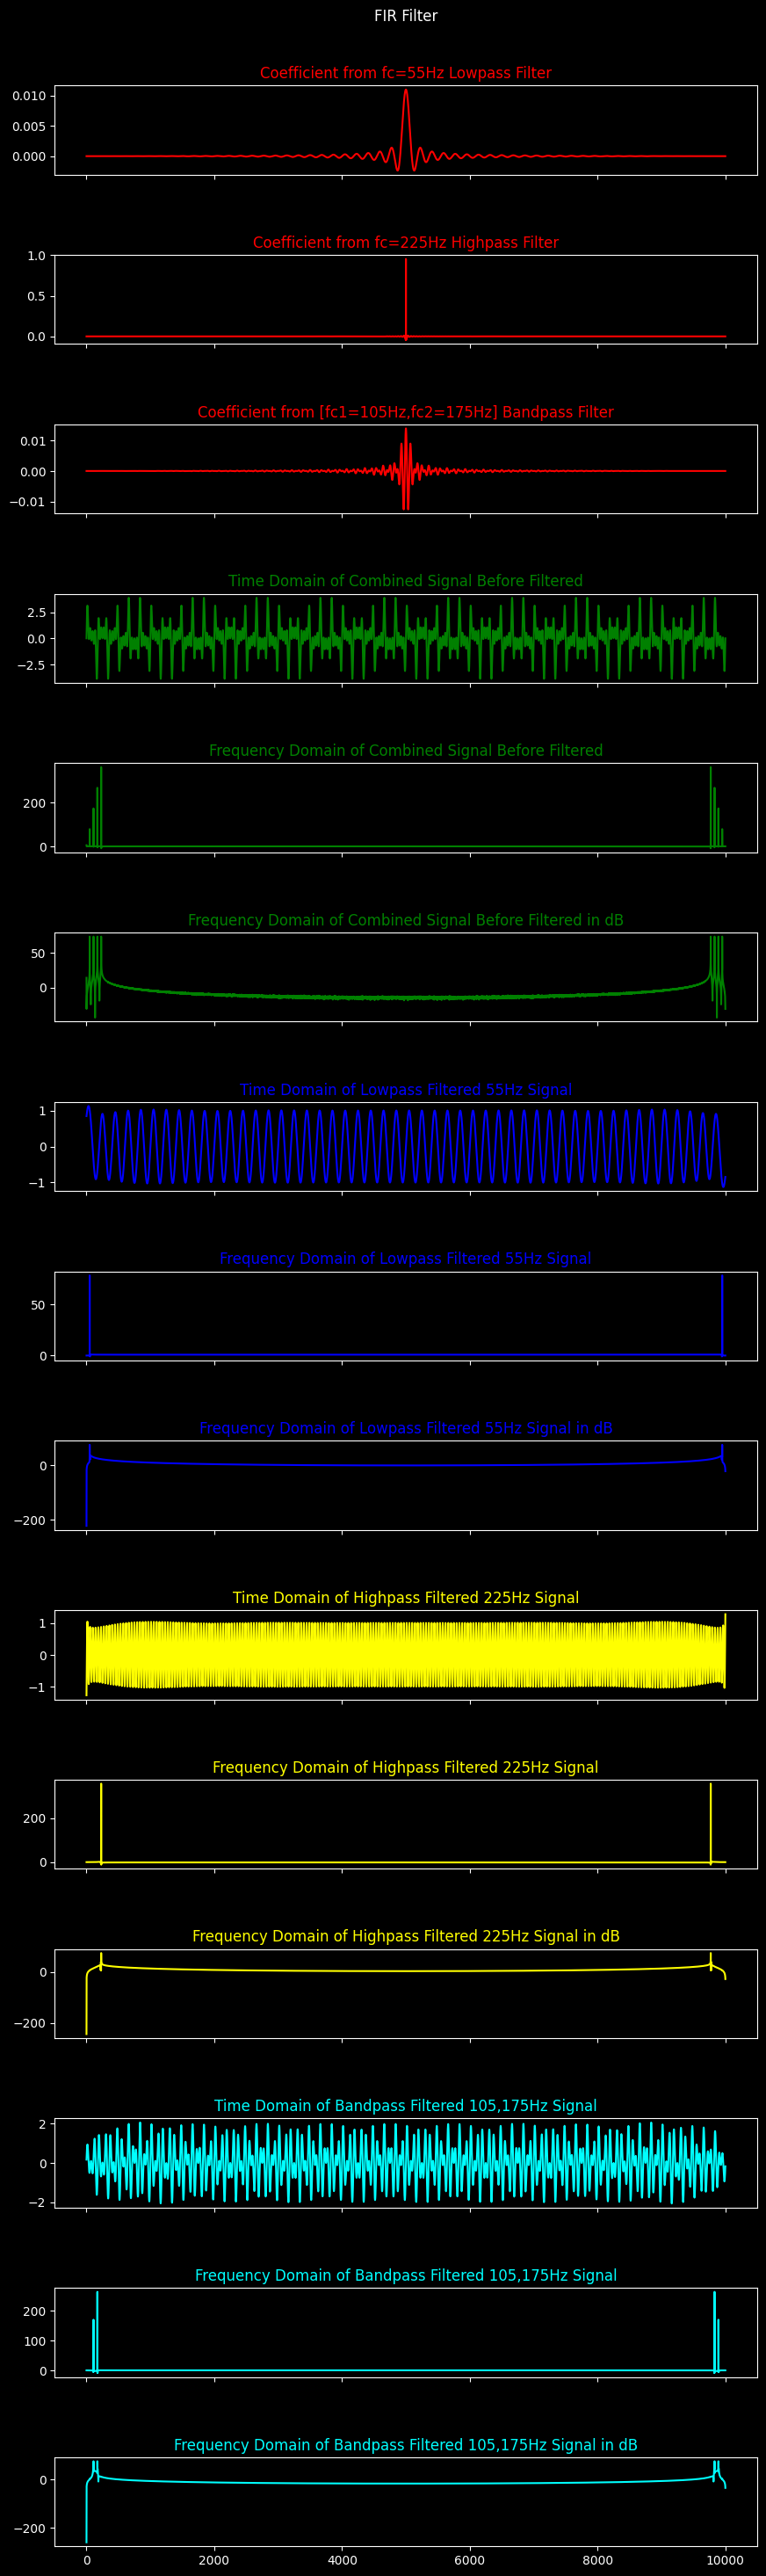

In [30]:
f, plt_arr = plt.subplots(15, figsize=(10, 35), sharex=True)
f.suptitle("FIR Filter", y=0.925)

plt_arr[0].plot(lowpass_coef, color='red')
plt_arr[0].set_title('Coefficient from fc=55Hz Lowpass Filter', color='red')

plt_arr[1].plot(highpass_coef, color='red')
plt_arr[1].set_title('Coefficient from fc=225Hz Highpass Filter', color='red')

plt_arr[2].plot(bandpass_coef, color='red')
plt_arr[2].set_title(
    'Coefficient from [fc1=105Hz,fc2=175Hz] Bandpass Filter', color='red')


plt_arr[3].plot(sig_50Hz_110Hz_170Hz_230Hz_random, color='green')
plt_arr[3].set_title(
    'Time Domain of Combined Signal Before Filtered', color='green')

plt_arr[4].plot(freq_domain_sig_50Hz_110Hz_170Hz_230Hz_random, color='green')
plt_arr[4].set_title(
    'Frequency Domain of Combined Signal Before Filtered', color='green')

plt_arr[5].plot(
    freq_domain_sig_50Hz_110Hz_170Hz_230Hz_random_db, color='green')
plt_arr[5].set_title(
    'Frequency Domain of Combined Signal Before Filtered in dB', color='green')


plt_arr[6].plot(lpf_output, color='blue')
plt_arr[6].set_title(
    'Time Domain of Lowpass Filtered 55Hz Signal', color='blue')

plt_arr[7].plot(freq_domain_sig_filtered_55Hz, color='blue')
plt_arr[7].set_title(
    'Frequency Domain of Lowpass Filtered 55Hz Signal', color='blue')

plt_arr[8].plot(freq_domain_sig_filtered_55Hz_db, color='blue')
plt_arr[8].set_title(
    'Frequency Domain of Lowpass Filtered 55Hz Signal in dB', color='blue')


plt_arr[9].plot(hpf_output, color='yellow')
plt_arr[9].set_title(
    'Time Domain of Highpass Filtered 225Hz Signal', color='yellow')

plt_arr[10].plot(freq_domain_sig_filtered_225Hz, color='yellow')
plt_arr[10].set_title(
    'Frequency Domain of Highpass Filtered 225Hz Signal', color='yellow')

plt_arr[11].plot(freq_domain_sig_filtered_225Hz_db, color='yellow')
plt_arr[11].set_title(
    'Frequency Domain of Highpass Filtered 225Hz Signal in dB', color='yellow')


plt_arr[12].plot(bandpass_output, color='cyan')
plt_arr[12].set_title(
    'Time Domain of Bandpass Filtered 105,175Hz Signal', color='cyan')

plt_arr[13].plot(freq_domain_sig_filtered_105_175Hz, color='cyan')
plt_arr[13].set_title(
    'Frequency Domain of Bandpass Filtered 105,175Hz Signal', color='cyan')

plt_arr[14].plot(freq_domain_sig_filtered_105_175Hz_db, color='cyan')
plt_arr[14].set_title(
    'Frequency Domain of Bandpass Filtered 105,175Hz Signal in dB', color='cyan')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,
                    top=0.9, wspace=0.9, hspace=0.9)
plt.show()
